In [12]:
import numpy as np

In [35]:
# this block of code is not very important here - tryting to reverse engineer things here 
from scipy.io import wavfile
fs, data = wavfile.read('tester.wav')
print(fs)
print(data)
print(data.shape)

250000
[   0    0    0 ... -531 -175 -377]
(14598982,)


In [13]:
a = np.load('readnumpy.npy')

In [14]:
# storing the shape of the numpy array in a variable to access its different fields 
l = a.shape

observations = l[0]
timeMarks = l[1]
freq = l[2]

In [26]:
count = 0
num = observations * timeMarks

result = [[] for _ in range(num)]

for x in range(0, num):
    result[x].append(x*0.01)
    index1 = x // 96
    index2 = x % 96
    result[x].append(a[index1][index2])
    
print(result[0])

[0.0, array([-4.60441965, -4.6045388 , -4.60474968, -4.60478941, -4.60434184,
       -4.60456831, -4.60440197, -4.60399346, -4.60454952, -4.60456752,
       -4.6045401 , -4.60481015, -4.60459814, -4.60482189, -4.60462691,
       -4.60394851, -4.60397135, -4.60413752, -4.60414014, -4.60444042,
       -4.60364404, -4.60295115, -4.60041452, -4.60269036, -4.60358032,
       -4.60400852, -4.60477359, -4.60329929, -4.60241865, -4.6036583 ,
       -4.60286638, -4.6039387 , -4.60314289, -4.60311125, -4.60279714,
       -4.60145259, -4.6023406 , -4.60329809, -4.60174796, -4.60180934,
       -4.60261065, -4.60279878, -4.60340004, -4.60405838, -4.60215145,
       -4.60175434, -4.60210111, -4.60175544, -4.60089919, -4.60348942,
       -4.60261432, -4.60139751, -4.60018669, -4.59930838, -4.60008962,
       -4.60167221, -4.60070579, -4.60133804, -4.59988321, -4.60080316,
       -4.60087881, -4.5987267 , -4.60019588, -4.59890431])]


/Users/tusharpoddar/opt/anaconda3/envs/final/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Only one segment is calculated since parameter NFFT (=512) >= signal length (=64).
  del sys.path[0]


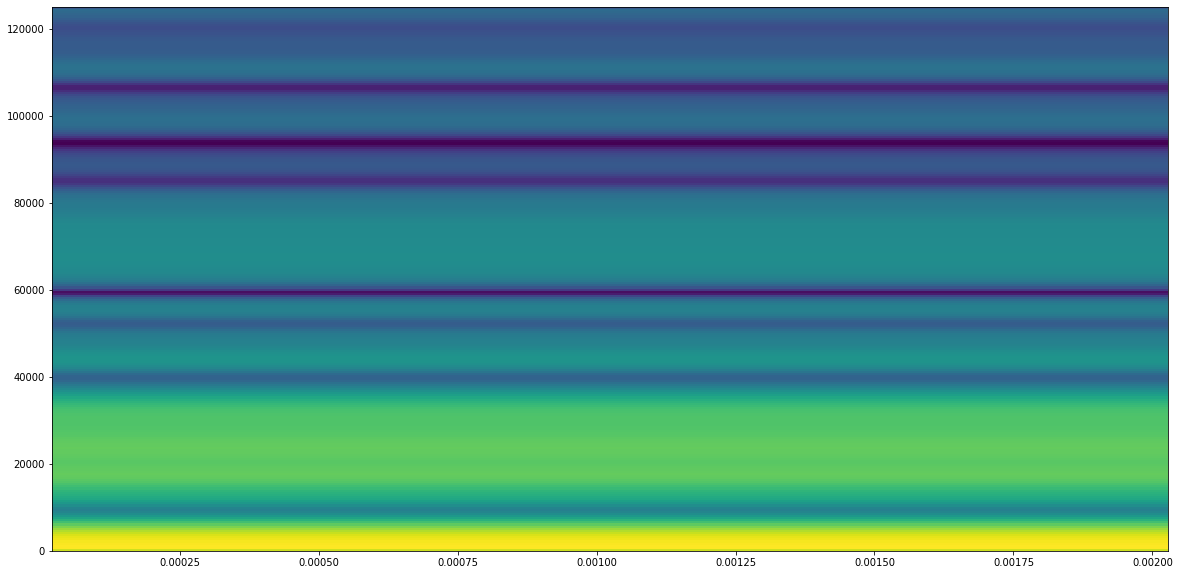

In [34]:
# create a spectrogram with matplotlib
NFFT = 512 # the length of the windowing segments
# dont know what the sampling rate is 
# in the example given to us this is returned as a output of the wavefile.read argument
fs = 250000
plt.figure(figsize = (20,10))

# converting a list to a numpy array in order for the input to be in the correct form
npa = np.array(result[150][1])

# takes in a 1-d array ie the data it needs to plot, the sampling frequency
# the non-overlap which is the 
Pxx, freqs, bins, im = plt.specgram(npa, NFFT=NFFT, Fs=fs, noverlap=10)

In [11]:
import xarray as xr

xr_spec = xr.DataArray(np.log(Pxx),dims = ('freq','time') ,coords = {'freq':freqs,'time':bins})

xr_spec.name = 'Spectrogram'

NameError: name 'Pxx' is not defined